In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../dataset/next_cycle.csv')
df

,Sleeping_Hours,Habits,Stress_Level,Activity_Level,Mood_Swings,Diet_Quality,Water_Intake,Menstrual_Flow_Intensity,BMI,Daily_Step_Count,Cycle_Regularity,Hormonal_Medication,Cycle_Length
0,7.17,1,2,5,1,4,2.53,1,22.51,11770,1.0,0,25.0
1,4.00,2,4,1,3,1,1.23,3,26.00,4772,0.0,0,38.6
2,5.37,1,5,1,3,2,1.92,3,23.95,2987,0.0,1,40.0
3,7.00,2,2,4,1,4,2.31,2,21.27,10824,1.0,0,25.7
4,8.91,0,1,5,1,3,3.73,1,22.73,8875,1.0,0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.00,1,4,2,3,2,1.73,3,21.99,3670,0.0,0,35.0
4996,8.92,1,2,5,1,3,2.29,1,19.79,12541,1.0,1,28.2
4997,4.01,1,5,2,3,1,1.89,3,24.13,2873,0.0,0,35.6
4998,4.00,2,4,2,3,2,2.00,3,22.70,2638,0.0,1,37.6


In [3]:
X = df.drop(columns=['Cycle_Length'])
y = df['Cycle_Length']

In [4]:
X.columns

Index(['Sleeping_Hours', 'Habits', 'Stress_Level', 'Activity_Level',
       'Mood_Swings', 'Diet_Quality', 'Water_Intake',
       'Menstrual_Flow_Intensity', 'BMI', 'Daily_Step_Count',
       'Cycle_Regularity', 'Hormonal_Medication'],
      dtype='object')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
lstm = Sequential()
lstm.add(LSTM(30, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
lstm.add(Dense(1)) 

c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
lstm.compile(optimizer='adam', loss='mse')

In [9]:
print("Training the model...")
history = lstm.fit(X_train_lstm, y_train, epochs=30, batch_size=40, validation_data=(X_test_lstm, y_test))

Training the model...
Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 963.7156 - val_loss: 213.4158
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 172.0111 - val_loss: 61.5214
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.1243 - val_loss: 20.4496
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17.5296 - val_loss: 7.3635
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6487 - val_loss: 4.6503
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0287 - val_loss: 4.1884
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5751 - val_loss: 3.9696
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0118 - val_loss: 3.5547
Epoch 9/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9617 - val_loss: 3.3436
Epoch 10/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7255 - val_loss: 3.1646
Epoch 11/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7225 - val_loss: 3.4484
Epoch 12/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s

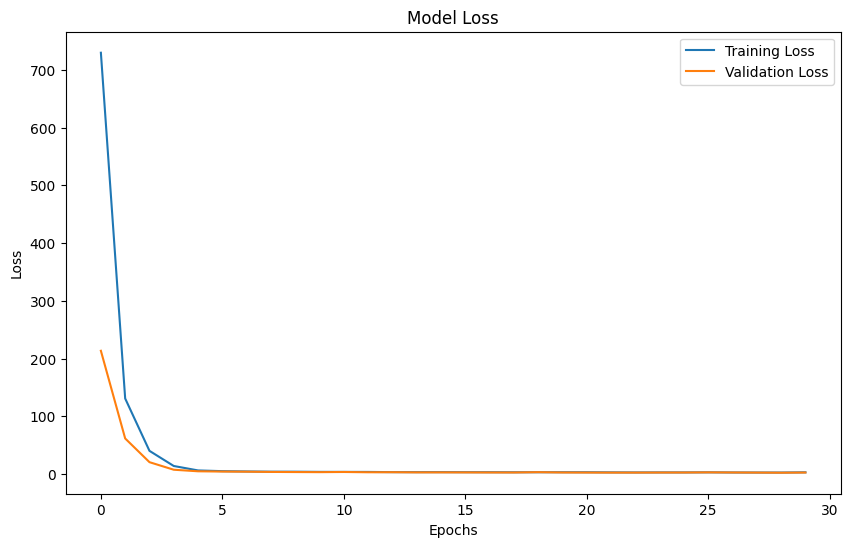

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
print("Evaluating the model...")
y_pred = lstm.predict(X_test_lstm)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Evaluating the model...
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [12]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.308467337544759
Root Mean Squared Error (RMSE): 1.5732780276689438


In [13]:
df

,Sleeping_Hours,Habits,Stress_Level,Activity_Level,Mood_Swings,Diet_Quality,Water_Intake,Menstrual_Flow_Intensity,BMI,Daily_Step_Count,Cycle_Regularity,Hormonal_Medication,Cycle_Length
0,7.17,1,2,5,1,4,2.53,1,22.51,11770,1.0,0,25.0
1,4.00,2,4,1,3,1,1.23,3,26.00,4772,0.0,0,38.6
2,5.37,1,5,1,3,2,1.92,3,23.95,2987,0.0,1,40.0
3,7.00,2,2,4,1,4,2.31,2,21.27,10824,1.0,0,25.7
4,8.91,0,1,5,1,3,3.73,1,22.73,8875,1.0,0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.00,1,4,2,3,2,1.73,3,21.99,3670,0.0,0,35.0
4996,8.92,1,2,5,1,3,2.29,1,19.79,12541,1.0,1,28.2
4997,4.01,1,5,2,3,1,1.89,3,24.13,2873,0.0,0,35.6
4998,4.00,2,4,2,3,2,2.00,3,22.70,2638,0.0,1,37.6


LSTM

In [14]:
# Define the test samples
test_samples = [
    [4.00, 2, 4, 1, 3, 2, 1.10, 3, 27.82, 2363, 0.0, 1],
    [3.20, 1, 5, 2, 4, 2, 1.20, 2, 25.40, 3180, 1.0, 0],
    [6.50, 0, 2, 4, 1, 3, 1.80, 3, 26.50, 5600, 0.0, 0],
    [5.00, 2, 4, 3, 2, 1, 1.50, 2, 28.00, 3900, 0.0, 1],
    [7.80, 1, 3, 2, 3, 4, 1.60, 1, 24.20, 4500, 0.0, 0]
]

# Loop through each test sample, scale it, and make a prediction
for idx, test in enumerate(test_samples):
    # Scale the test sample
    test_scaled = scaler.transform([test])  
    
    # Predict with the LSTM model
    prediction = lstm.predict([test_scaled])
    
    # Print the prediction for each test sample
    print(f"Prediction for Test Sample {idx + 1}: {prediction[0][0]:.2f}")


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*',)
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Prediction for Test Sample 1: 38.70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction for Test Sample 2: 38.91


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction for Test Sample 3: 28.92
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction for Test Sample 4: 38.72


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction for Test Sample 5: 27.29


In [15]:
import pickle

with open("next_cycle_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

NameError: name 'fdasfdsa' is not defined

Random Forest

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
df[df['Cycle_Length'] == 40]

,Sleeping_Hours,Habits,Stress_Level,Activity_Level,Mood_Swings,Diet_Quality,Water_Intake,Menstrual_Flow_Intensity,BMI,Daily_Step_Count,Cycle_Regularity,Hormonal_Medication,Cycle_Length
2,5.37,1,5,1,3,2,1.92,3,23.95,2987,0.0,1,40.0
14,6.00,2,5,1,4,2,1.73,3,29.49,6282,0.0,0,40.0
15,5.59,1,4,2,3,1,1.00,3,23.36,2471,0.0,0,40.0
21,5.88,2,4,2,3,1,1.00,3,30.00,6989,0.0,0,40.0
24,4.56,1,5,2,3,1,1.63,3,23.24,6374,0.0,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,4.32,1,5,1,4,1,1.18,3,23.16,3664,0.0,0,40.0
4984,4.00,2,4,1,3,2,1.10,3,27.82,2363,0.0,1,40.0
4992,5.40,2,4,1,3,1,1.00,3,24.85,2263,0.0,1,40.0
4993,4.00,1,5,2,4,2,1.42,3,22.28,4915,0.0,0,40.0


In [ ]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error: {mse:.2f}")

Model Mean Squared Error: 1.77


In [ ]:
for idx, test in enumerate(test_samples):
    # Scale the test sample
    test_scaled = scaler.transform([test])  
    
    # Predict with the LSTM model
    prediction = rf_model.predict(test_scaled)
    
    
    # Print the prediction for each test sample
    print(f"Prediction for Test Sample {idx + 1}: {prediction[0]:.2f}")

Prediction for Test Sample 1: 39.79
Prediction for Test Sample 2: 35.67
Prediction for Test Sample 3: 30.91
Prediction for Test Sample 4: 32.65
Prediction for Test Sample 5: 32.35


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

XG Boost

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgboost_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error: {mse:.2f}")


Model Mean Squared Error: 1.72


In [ ]:
for idx, test in enumerate(test_samples):
    # Scale the test sample
    test_scaled = scaler.transform([test])  # Use transform for test data, not fit_transform
    
    # Predict with the LSTM model
    prediction = xgboost_model.predict(test_scaled)
    
    # Print the prediction for each test sample
    print(f"Prediction for Test Sample {idx + 1}: {prediction[0]:.2f}")

Prediction for Test Sample 1: 39.81
Prediction for Test Sample 2: 38.72
Prediction for Test Sample 3: 37.49
Prediction for Test Sample 4: 38.36
Prediction for Test Sample 5: 28.70


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()


model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally: Print the coefficients of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 1.6295850807110213
R-squared: 0.9611495599934327
Coefficients: [-0.01296001  0.01730967  1.51414914 -1.01499013 -0.04907311 -0.80918316
  0.06871829  0.00621491  0.00547009 -0.01850296 -3.27639126  0.43288544]
Intercept: 32.473057142857144


In [ ]:
for idx, test in enumerate(test_samples):
    # Scale the test sample
    test_scaled = scaler.transform([test])  # Use transform for test data, not fit_transform
    
    # Predict with the LSTM model
    prediction = model.predict(test_scaled)
    
    # Print the prediction for each test sample
    print(f"Prediction for Test Sample {idx + 1}: {prediction[0]:.2f}")

Prediction for Test Sample 1: 39.19
Prediction for Test Sample 2: 31.82
Prediction for Test Sample 3: 33.32
Prediction for Test Sample 4: 38.36
Prediction for Test Sample 5: 35.16


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

In [ ]:
# Save model
lstm.save("lstm_model.h5")

In [ ]:
import pickle

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [ ]:
import pickle

with open("xg_boost.pkl", "wb") as f:
    pickle.dump(xgboost_model, f)

In [ ]:
import pickle

with open("linear_rg.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
lstm

<Sequential name=sequential, built=True>

In [ ]:
test_data = [
    [5.30, 1, 3, 2, 4, 1, 1.20, 3, 26.50, 4000, 0.0, 0],
    [6.10, 0, 4, 3, 5, 2, 1.50, 2, 28.30, 5300, 1.0, 1],
    [7.00, 2, 5, 1, 3, 3, 1.80, 1, 24.00, 6000, 0.0, 1],
    [4.50, 1, 2, 4, 2, 4, 1.60, 3, 29.10, 3000, 1.0, 0],
    [8.00, 2, 3, 2, 4, 2, 1.30, 2, 27.20, 5600, 0.0, 0],
    [3.80, 0, 3, 1, 2, 1, 1.10, 3, 25.50, 3200, 1.0, 1],
    [5.90, 1, 4, 2, 3, 3, 1.40, 2, 28.70, 5400, 0.0, 0],
    [6.80, 0, 2, 3, 4, 4, 1.50, 1, 26.10, 4900, 0.0, 0],
    [5.60, 2, 4, 1, 2, 2, 1.20, 2, 25.90, 4000, 0.0, 1],
    [4.20, 0, 5, 4, 3, 1, 1.70, 3, 27.80, 3800, 1.0, 0]
]

for idx, test in enumerate(test_data):
    # Scale the test sample
    test_scaled = scaler.transform([test])  # Transform each sample individually
    
    # Reshape for LSTM input: [samples, time_steps, features
    
    # Predict with the LSTM model
    prediction = lstm.predict([test_scaled])
    
    # Print the prediction for each test sample
    print(f"Prediction for Test Sample {idx + 1}: {prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction for Test Sample 1: 38.29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Prediction for Test Sample 2: 29.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction for Test Sample 3: 39.00


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction for Test Sample 4: 28.29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction for Test Sample 5: 37.84


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction for Test Sample 6: 29.64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction for Test Sample 7: 38.15


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for Test Sample 8: 37.38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for Test Sample 9: 40.15


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction for Test Sample 10: 27.35
